In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bestsellers_with_categories.csv")

# Первичное исследование данных

In [3]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [5]:
data.shape

(550, 7)

In [6]:
data.isna().sum() # Ответ: Есть ли в каких либо переменных пропуски: Нет

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [7]:
data['genre'].unique() # Ответ: Какие есть уникальные жанры: 'Non Fiction', 'Fiction'

array(['Non Fiction', 'Fiction'], dtype=object)

(array([266., 216.,  42.,   9.,  12.,   2.,   0.,   1.,   0.,   2.]),
 array([  0. ,  10.5,  21. ,  31.5,  42. ,  52.5,  63. ,  73.5,  84. ,
         94.5, 105. ]),
 <BarContainer object of 10 artists>)

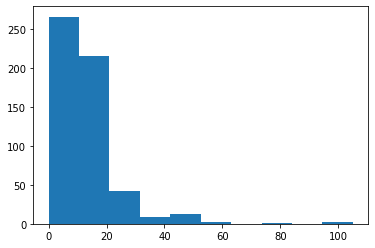

In [8]:
plt.hist(data.price)

In [9]:
data['price'].describe() 
# Ответ: Mаксимальная цена: 105
# Ответ: Минимальная цена: 0
# Ответ: Средняя цена: 13.10
# Ответ: Медианная цена: 11

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

# Поиск и сортировка данных

In [10]:
data['user_rating'].max() # Ответ: Какой рейтинг в датасете наивысший: 4.9

4.9

In [11]:
len(data.where(data['user_rating'] == data['user_rating'].max()).dropna())
# Ответ: Сколько книг имеют такой рейтинг: 52

52

In [12]:
data.where(data['reviews'] == data['reviews'].max()).dropna()
# Ответ: У какой книги больше всего отзывов: Where the Crawdads Sing

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841.0,15.0,2019.0,Fiction


In [13]:
books_by_2015 = data.where(data['year'] == 2015).dropna()

In [14]:
books_by_2015.where(books_by_2015['price'] == books_by_2015['price'].max()).dropna()
# Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая: 
# Publication Manual of the American Psychologic..

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580.0,46.0,2015.0,Non Fiction


In [15]:
len(data.where((data['genre'] == 'Fiction') & (data['year'] == 2010)).dropna())
# Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &): 20

20

In [16]:
conditional_1 = data.where((data['year'] == 2010) | (data['year'] == 2011)).dropna()

In [17]:
len(conditional_1.where(conditional_1['user_rating'] == data['user_rating'].max()).dropna())
# Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin): 1

1

In [18]:
data.where((data['year'] == 2015) & (data['price'] < 8)).dropna().sort_values(by=['price'], ascending=False)
# Какая книга последняя в отсортированном списке: To Kill a Mockingbird

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169.0,7.0,2015.0,Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925.0,6.0,2015.0,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308.0,6.0,2015.0,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951.0,6.0,2015.0,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613.0,5.0,2015.0,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360.0,5.0,2015.0,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546.0,5.0,2015.0,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871.0,5.0,2015.0,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922.0,5.0,2015.0,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134.0,5.0,2015.0,Non Fiction


# Агрегирование данных и соединения таблиц

In [19]:
data.groupby(['genre']).agg({'price':['min', 'max']})
# Максимальная цена для жанра Fiction: 82
# Минимальная цена для жанра Fiction: 0
# Максимальная цена для жанра Non Fiction: 105
# Минимальная цена для жанра Non Fiction: 0

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [20]:
data_by_author = data.groupby(['author']).agg({'author':'count'}).rename(columns = {'author':  'numb_books'})

In [21]:
data_by_author.shape # (248, 1)

(248, 1)

In [22]:
data_by_author

,numb_books
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [23]:
data_by_author.loc[data_by_author['numb_books'] == data_by_author['numb_books'].max()] 
# У какого автора больше всего книг: Jeff Kinney

,numb_books
author,
Jeff Kinney,12


In [24]:
data_by_author['numb_books'].where(data_by_author['numb_books'] == data_by_author['numb_books'].max()).dropna()
# 2 вариант решения задачи через where 

author
Jeff Kinney    12.0
Name: numb_books, dtype: float64

In [25]:
data_by_avg = data.groupby(['author']).agg({'user_rating':'mean'}).rename(columns = {'user_rating':  'avg_rating'})
# У какого автора средний рейтинг минимальный: Donna Tartt
# Какой у этого автора средний рейтинг: 3.9

In [26]:
data_by_avg.loc[data_by_avg['avg_rating'] == data_by_avg['avg_rating'].min()]

,avg_rating
author,
Donna Tartt,3.9


In [27]:
data_by_avg['avg_rating'].where(data_by_avg['avg_rating'] == data_by_avg['avg_rating'].min()).dropna()
# 2 вариант решения задачи через where 

author
Donna Tartt    3.9
Name: avg_rating, dtype: float64

In [28]:
final_res = pd.concat([data_by_author, data_by_avg], axis=1).reset_index()

In [29]:
final_res.sort_values(by=['numb_books', 'avg_rating'])
# Ответ: Какой автор первый в списке: Muriel Barbery

,author,numb_books,avg_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727
